<a href="https://colab.research.google.com/github/vitorquintella/LetsCode-Exercicios/blob/main/Arvores_exerc%C3%ADcio_Titanic_Let's_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importação de dados e olhar inicial

In [21]:
raw_train_data = pd.read_csv('https://raw.githubusercontent.com/vitorquintella/LetsCode-Exercicios/main/data/Titanic%20-%20train.csv')
# test_data = pd.read_csv('https://raw.githubusercontent.com/vitorquintella/LetsCode-Exercicios/main/data/Titanic%20-%20test.csv')
# test_data doesn't have y values. so we will use train data and split it into train and validation

In [22]:
from sklearn.model_selection import train_test_split
# Separação de dados treino/validação será anterior ao EDA, para não nos enviesarmos treino com dados de validação
train_data, validation_data = train_test_split(raw_train_data,
                                               train_size=0.80,
                                               random_state=42,
                                               stratify=raw_train_data['Survived'])

In [23]:
%load_ext google.colab.data_table
display(train_data)
%unload_ext google.colab.data_table

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S
801,802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
359,360,1,3,"Mockler, Miss. Helen Mary ""Ellie""",female,NaN,0,0,330980,7.8792,NaN,Q
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S
462,463,0,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,E63,S


In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 692 to 507
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          575 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        160 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


Para as colunas nulas, vamos simplificar usando o simpleinputer, "most_frequent"

`SimpleImputer(strategy='most_frequent')`

In [25]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,575.000000,712.000000,712.000000,712.000000
mean,444.405899,0.383427,2.308989,29.807687,0.492978,0.390449,31.819826
std,257.465527,0.486563,0.833563,14.485211,1.060720,0.838134,48.059104
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,439.500000,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200
75%,667.250000,1.000000,3.000000,39.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
train_data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,712,712,712,160,710
unique,712,2,571,127,3
top,"Lam, Mr. Ali",male,1601,G6,S
freq,1,459,6,4,516


Por enquanto não vamos usar variavel nome, ticket e cabine.


*   Melhoria: Verificar titulos do nome.
*   Melhoria: Identificar sobrevivencia em familia pelo sobrenome.



In [27]:
train_data = train_data.drop(columns=['PassengerId','Name','Ticket','Cabin'])
validation_data = validation_data.drop(columns=['PassengerId','Name','Ticket','Cabin'])

# EDA rápido

## Numéricos

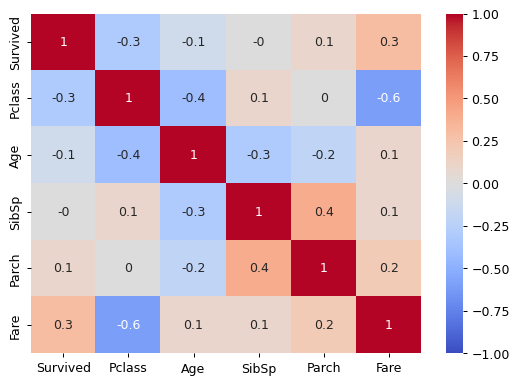

In [28]:
### Para valores numéricos
plt.figure(figsize=(7, 5), dpi= 90)
g = sns.heatmap(train_data.corr().round(1),
                annot=True, center=0, vmin=-1, vmax=1,
                cmap = "coolwarm")
plt.show()

Quase todas as variaveis numéricas parecem influenciar.


*   Melhoria: Poderiamos melhorar verificando se algumas delas não deveriam ser categóricas.
* Possível overfitting: Preço da passagem tem uma relação direta com a classe de viagem e pode não agregar informação por conta própria.


## Categóricos

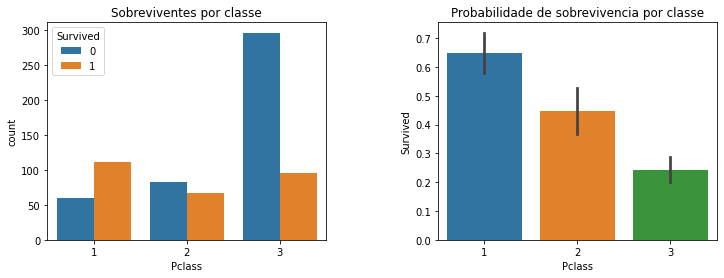

In [100]:
# A classe comprada foi importante para diferenciar a sobrevivencia.
# Ela parece ser mais uma feature categórica do que uma feature continua

# Multiplos plots em mesmo plot:
fig = plt.figure(figsize=(12,4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 2, 1)
sns.countplot(data=train_data, x="Pclass", hue="Survived")
plt.title("Sobreviventes por classe")

ax = fig.add_subplot(1, 2, 2)
sns.barplot(data=train_data, x="Pclass", y="Survived")
plt.title("Probabilidade de sobrevivencia por classe")

plt.show()

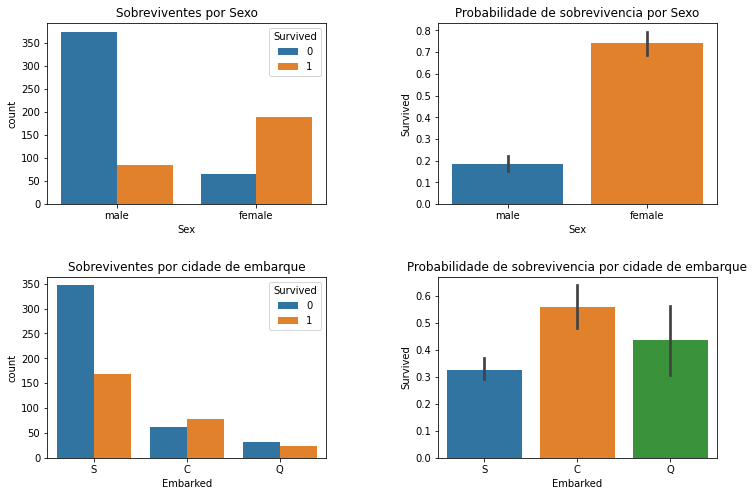

In [101]:
# Para valores categoricos
# A classe comprada foi importante para diferenciar a sobrevivencia.

# Multiplos plots em mesmo plot:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 2, 1)
sns.countplot(data=train_data, x="Sex", hue="Survived")
plt.title("Sobreviventes por Sexo")

ax = fig.add_subplot(2, 2, 2)
sns.barplot(data=train_data, x="Sex", y="Survived")
plt.title("Probabilidade de sobrevivencia por Sexo")

ax = fig.add_subplot(2, 2, 3)
sns.countplot(data=train_data, x="Embarked", hue="Survived")
plt.title("Sobreviventes por cidade de embarque")

ax = fig.add_subplot(2, 2, 4)
sns.barplot(data=train_data, x="Embarked", y="Survived")
plt.title("Probabilidade de sobrevivencia por cidade de embarque")

plt.show()

Variável ticket e nome não iremos utilizar por enquanto.


* Possível overfitting: A cidade de embarque influencia, mas pode ser alguma correlação com outro feature.
* Por exemplo, mais pessoas com passagem de classe 3? 

# Modelos

## Model Baseline (Árvore)

In [106]:
# Separação do target (usando apenas colunas "numéricas")
X_train = train_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
X_train = X_train.fillna(X_train.median())
y_train = train_data['Survived']

X_validation = validation_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
X_validation = X_validation.fillna(X_train.median())
y_validation = validation_data['Survived']

In [107]:
dtc = DecisionTreeClassifier(random_state=42,
                             max_depth=5,
                             min_impurity_decrease=0.001)

dtc.fit(X=X_train, y=y_train)
y_pred = dtc.predict(X_validation)



In [108]:
# Análise de resultados - métricas de avaliação
from sklearn.metrics import classification_report

print(classification_report(y_validation, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.88      0.77       110
           1       0.66      0.36      0.47        69

    accuracy                           0.68       179
   macro avg       0.67      0.62      0.62       179
weighted avg       0.68      0.68      0.66       179



## Árvore utilizando onehot encoder para categóricas

In [110]:
# Separação do target
X_train = train_data.drop(columns=['Survived'])
y_train = train_data['Survived']
X_validation = validation_data.drop(columns=['Survived'])
y_validation = validation_data['Survived']

In [111]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier


numeric_features = ['Age', 'SibSp','Parch', 'Fare']
numeric_transformer = SimpleImputer(strategy="median")

categorical_features = ["Pclass", "Sex", "Embarked"]
categorical_transformer = Pipeline(
    steps = [
             ("imputer", SimpleImputer(strategy="most_frequent")),
             ("onehot", OneHotEncoder(drop='if_binary'))
             ]
    )

preprocessor = ColumnTransformer(
    transformers=[
                  ("num", numeric_transformer, numeric_features),
                  ("cat", categorical_transformer, categorical_features),
                  ]
    )

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
pipe = Pipeline(
    steps = [
             ("preprocessor", preprocessor),
             ('model', DecisionTreeClassifier(random_state=42,
                                              max_depth=5,
                                              min_impurity_decrease=0.001))
             ]
    )

In [112]:
from sklearn import set_config
set_config(display="diagram")
display(pipe)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('model',
                 DecisionTreeClassifier(max_depth=5,
                                        min_impurity_decrease=0.001,
                                        random_state=42))])

In [113]:
pipe.fit(X=X_train, y=y_train)
y_pred = pipe.predict(X_validation)

In [114]:
# Análise de resultados - métricas de avaliação
from sklearn.metrics import classification_report

print(classification_report(y_validation, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       110
           1       0.75      0.59      0.66        69

    accuracy                           0.77       179
   macro avg       0.76      0.73      0.74       179
weighted avg       0.76      0.77      0.76       179



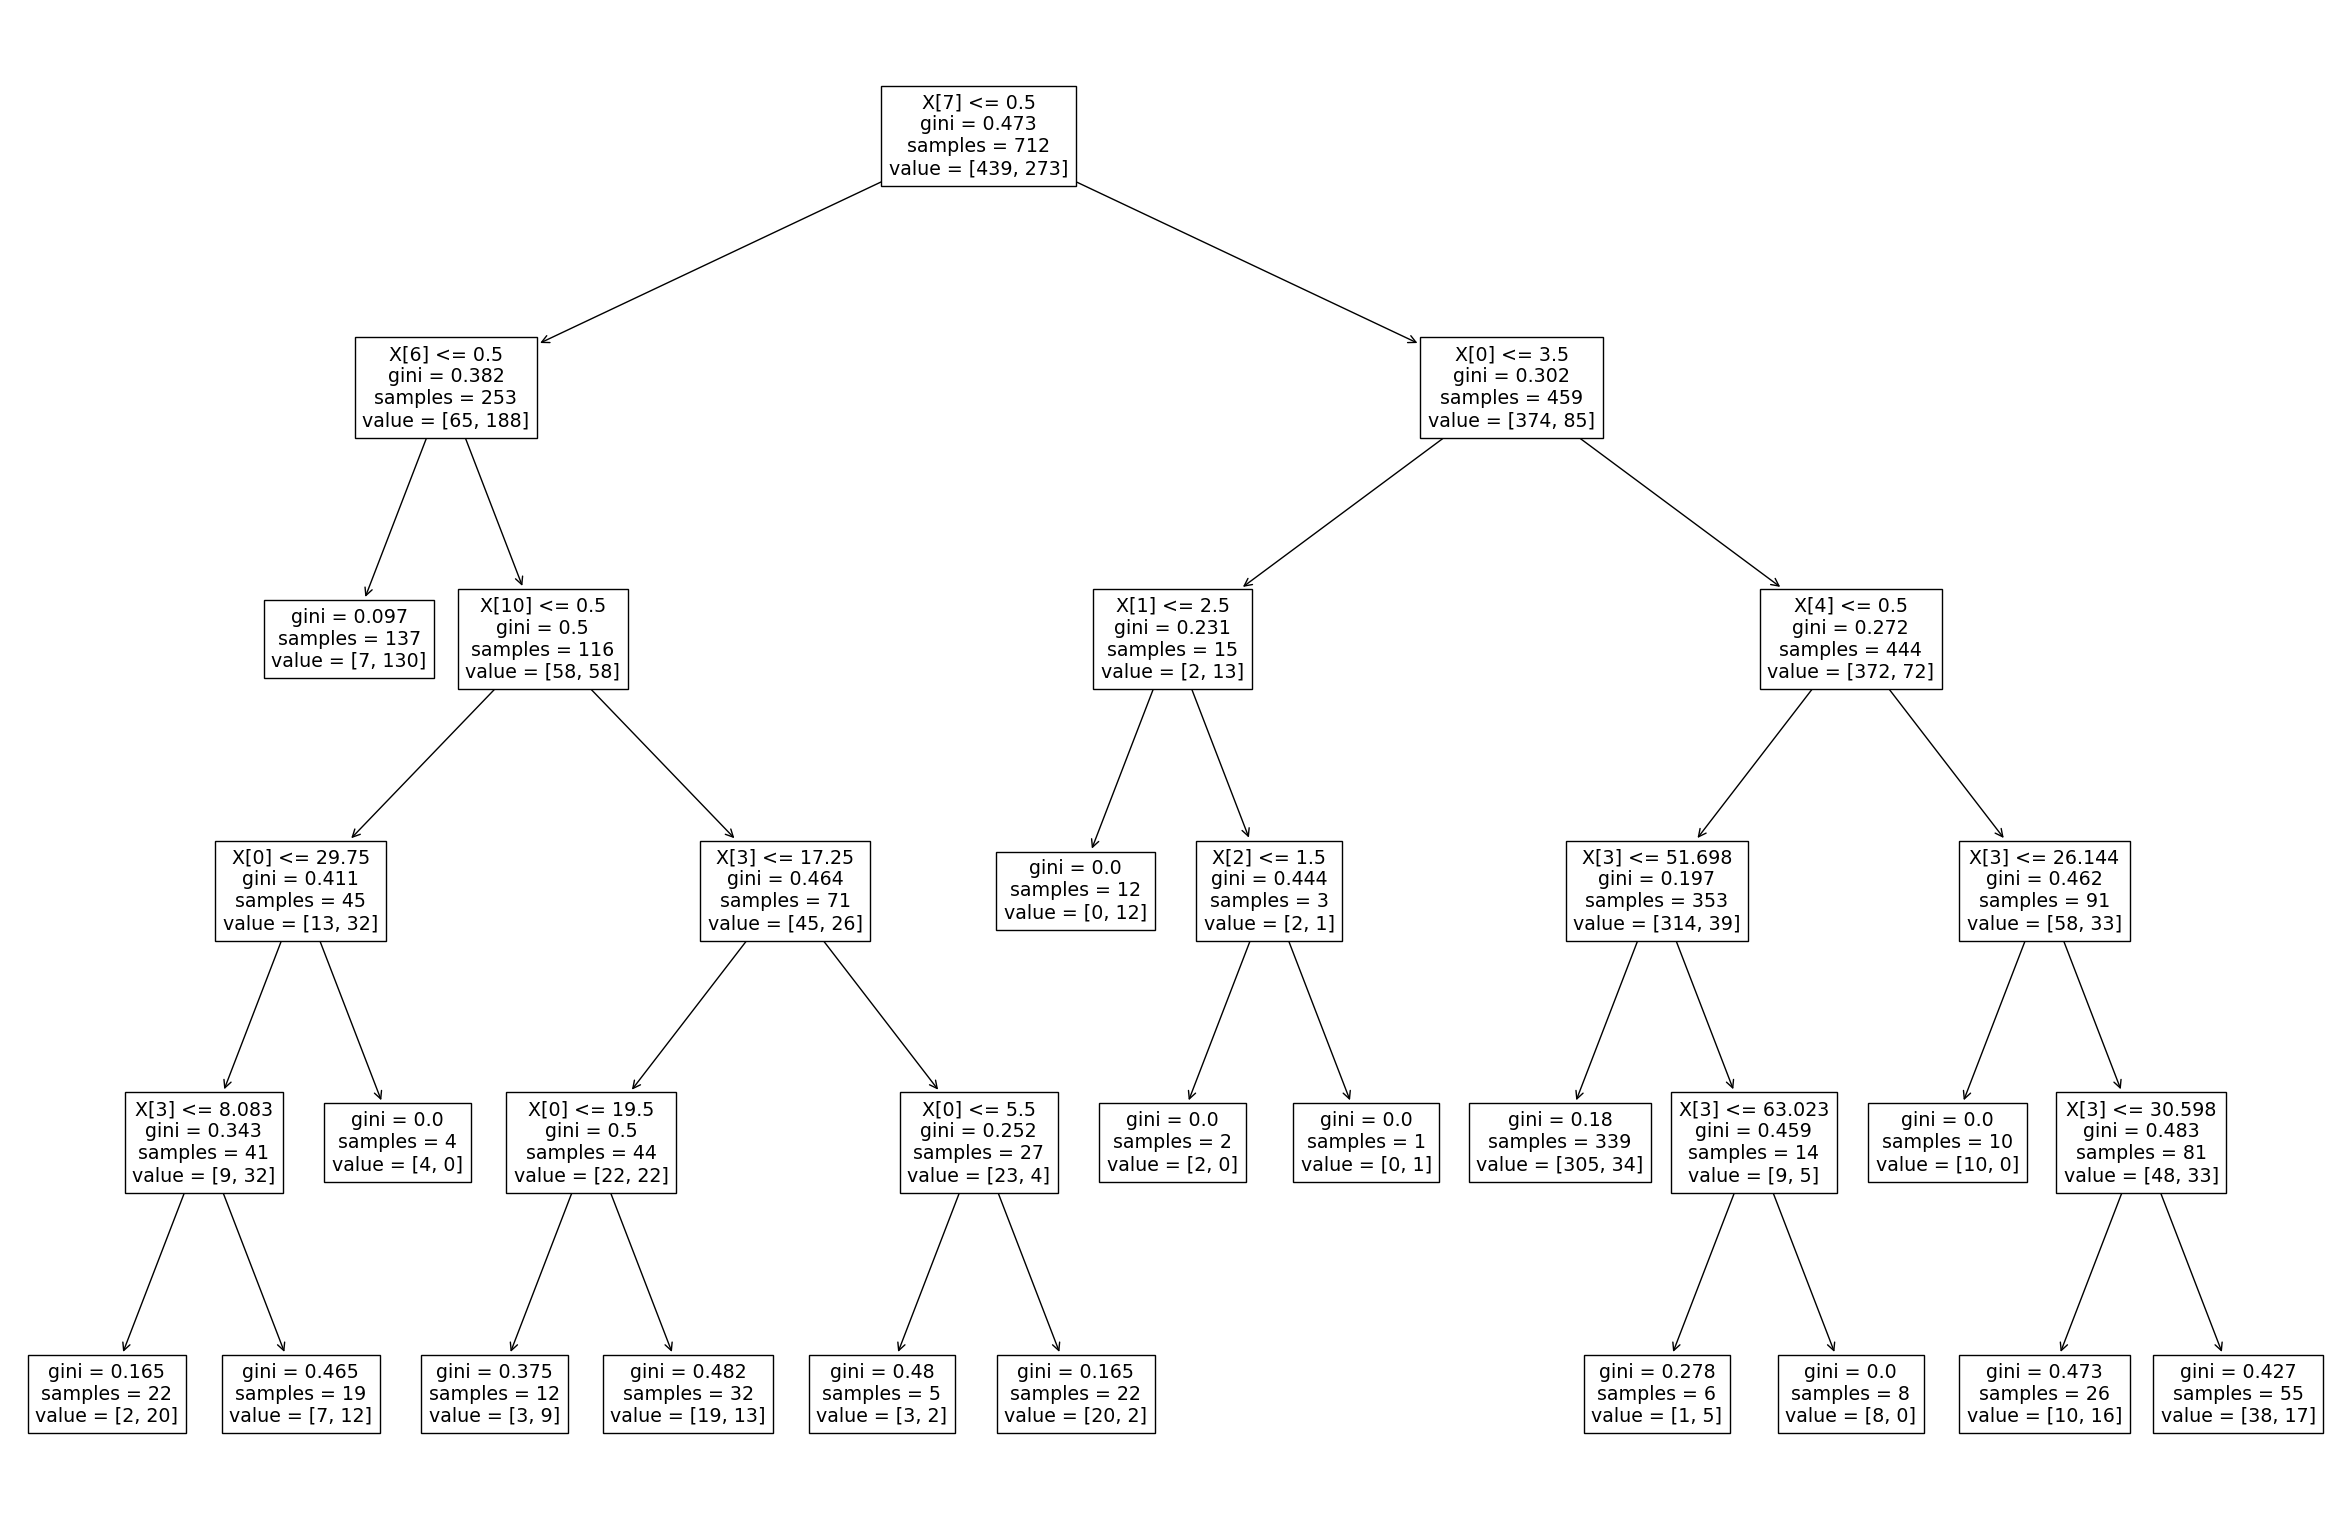

In [119]:
from sklearn import tree

plt.figure(figsize=(30, 20), dpi=100)
tree.plot_tree(pipe['model'])
plt.show()

### Registro de modelo final

In [116]:
pipe.get_params()

{'memory': None,
 'model': DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.001,
                        random_state=42),
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': 5,
 'model__max_features': None,
 'model__max_leaf_nodes': None,
 'model__min_impurity_decrease': 0.001,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__random_state': 42,
 'model__splitter': 'best',
 'preprocessor': ColumnTransformer(transformers=[('num', SimpleImputer(strategy='median'),
                                  ['Age', 'SibSp', 'Parch', 'Fare']),
                                 ('cat',
                                  Pipeline(steps=[('imputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('onehot',
                                                   OneHotEncoder(drop='if_bin

# Rascunhos

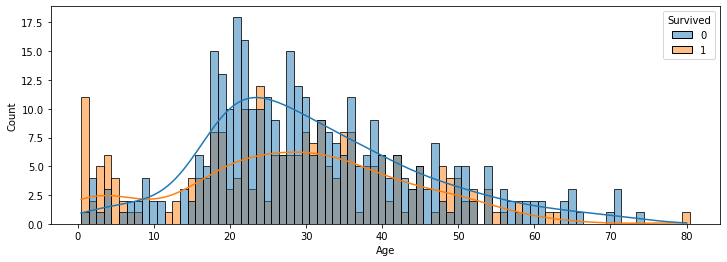

In [117]:
# Pequeno desvio favorecendo os mais jovens. (Mulheres e crianças primeiro?)
fig = plt.figure(figsize=(12,4))
sns.histplot(data=train_data, x="Age", hue = 'Survived', binwidth=1, kde=True);


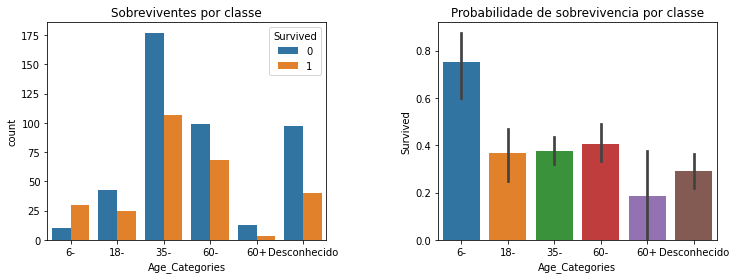

In [118]:
bins = [0, 6, 18, 35, 60, 100,999]
group_names = ['6-', '18-', '35-', '60-', '60+','Desconhecido']

train_data['Age_Categories'] = pd.cut(train_data['Age'], bins, labels=group_names)
train_data['Age_Categories'] = train_data['Age_Categories'].fillna('Desconhecido')


# Idades pequenas ajudam na sobrevivencia.
# Idades desconhecidas parecem facilitar.

# Multiplos plots em mesmo plot:
fig = plt.figure(figsize=(12,4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 2, 1)
sns.countplot(data=train_data, x="Age_Categories", hue="Survived")
plt.title("Sobreviventes por classe")

ax = fig.add_subplot(1, 2, 2)
sns.barplot(data=train_data, x="Age_Categories", y="Survived")
plt.title("Probabilidade de sobrevivencia por classe")

plt.show()